### We have data on the crowdfunding platform - Kickstarter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ks.csv', sep=";") #collecting data from the platform
Macro = pd.read_excel("macrofeatures.xlsx", engine="openpyxl") #Macroeconomic situation

In [3]:
data.head()

,Name,Category,Main_category,Currency,Deadline,Publication_data,State,Investor,Country,Collected_dollars,Target_dollars
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00


|***Columns*** |***Describe***|
|--------------|:-----------------------------|
|**Name**|name of the object for which need to raise money|
|**Currency**|subcategory more detailed category|
|**Deadline**|last day for gather money|
|**Publication_data**|day of publication|
|**State**|status of gather| 
|**Investor**|amount of investorov| 
|**Country**|in which country the request was created|
|**Collected_dollars**|amount of gathering|
|**Target_dollars**|necessary amount of gathering|

In [4]:
Macro.head()

,Unnamed: 0,Close_brent,Close_sugar,Close_cereals,Close_index_moex,Close_index_moex_10,Close_index_RGBI,Close_index_RTS_oil_and_gas,Close_index_RTS_metallurgy,Close_index_RTS_consumer_sector,Close_index_RTS_telecom,Close_index_RTS_finance,Close_index_RTS_transport,Close_index_RTS_chemicals,Close_index_RTS_broad_market,Close_index_RTS_electricity,dlk_cob_date
0,0,34.41,13.97,442.75,1797.27,3940.81,125.59,123.40,111.97,196.55,70.17,140.57,27.06,177.38,530.59,32.49,2016-02-24
1,1,35.06,14.24,445.25,1803.89,3977.35,126.44,124.22,112.51,198.03,70.56,142.64,27.43,179.48,536.20,33.07,2016-02-25
2,2,35.13,14.00,443.25,1816.73,4027.23,126.90,125.38,113.44,200.13,71.94,145.45,28.06,181.56,544.73,33.55,2016-02-26
3,3,36.64,14.36,445.00,1840.17,4084.24,126.87,126.69,114.66,200.32,72.41,147.22,28.49,186.76,552.82,34.41,2016-02-29
4,4,36.60,14.39,438.50,1844.17,4087.06,127.78,129.72,117.09,204.30,74.26,150.04,30.12,190.67,565.45,34.96,2016-03-01


###### Above we can see economic indicators in the world. Let's select one of the indicators (for example, oil) and use it as an additional prediction feature.

* Let's consider what states there are

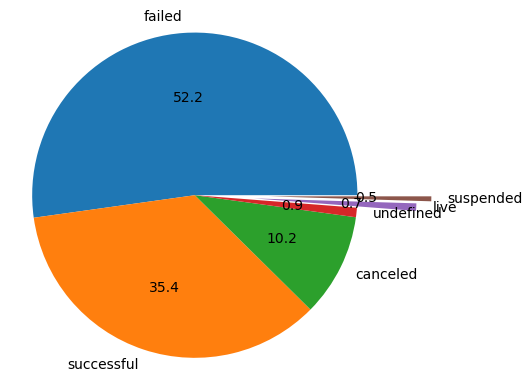

In [5]:
import seaborn as sns
#create pie chart
explode = (0, 0, 0, 0.0, 0.4, 0.5)
plt.pie(list(data.State.value_counts()), labels = list(data.State.value_counts().keys()), autopct='%.1f',radius = 1.1,explode =explode)
plt.show()

#### Let's leave only the necessary states and transfer them to the target
* 'failed' 
* 'successful'

In [6]:
data = data[data['State'].isin(['failed', 'successful'])] #leave only failed and successful
data.loc[(data['State'] == 'failed'), 'target'] = 0 #rename for binary format and created column tarfet
data['target'] = data['target'].fillna(1) #rename for binary format
data = data.drop(columns=['State']) #del column State
data['target'] = data['target'].astype(int)
data.head()

,Name,Category,Main_category,Currency,Deadline,Publication_data,Investor,Country,Collected_dollars,Target_dollars,target
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,23,US,600.00,600.0,1
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,20,US,502.00,10000.0,0
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,62,US,2414.00,1400.0,1
5,New Improv Comedy Venue in Des Moines,Theater,Theater,USD,2013-06-17,2013-05-03 16:17:21,86,US,10030.88,10000.0,1
6,The Seer and the Sword,Shorts,Film & Video,USD,2012-08-11,2012-07-12 05:19:53,0,US,0.00,10000.0,0


In [7]:
#Let's convert to datetime format
data['Deadline'] = pd.to_datetime(data['Deadline'])
data['Publication_data'] = pd.to_datetime(data['Publication_data'])

In [8]:
#Let's create a term column
data['Term'] = (data['Deadline'] - data['Publication_data']).dt.days

In [9]:
### Let's highlight the year the project was launched
data['Publication_year'] = data['Publication_data'].dt.year

In [10]:
### We leave the necessary only two columns, one with the date and the other with the economic indicator
Macro_brent = Macro[['Close_brent', 'dlk_cob_date']]

In [11]:
data.loc[:, 'Publication_data'] = data['Publication_data'].dt.date.astype('datetime64[ns]')
Macro_brent.loc[:, 'dlk_cob_date'] = pd.to_datetime(Macro_brent['dlk_cob_date'])


C:\Users\79832\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [12]:
Macro_brent = Macro_brent[['Close_brent', 'dlk_cob_date']].drop_duplicates() #удалим дубликаты

In [13]:
#### merge dataframe (base and additional economic indicators)
data = pd.merge(data,
         Macro_brent,
         left_on=['Publication_data'],
         right_on=['dlk_cob_date'],
         how='left')

In [14]:
data['Close_brent'].sort_values().min()# 
Macro_brent = Macro[['Close_brent', 'dlk_cob_date']] 
data['Close_brent'] = data['Close_brent'].fillna(34.41)

In [15]:
data = data.sort_values('Publication_data') #sorted of date publication

In [16]:
data = data.drop(['Deadline','Publication_data','dlk_cob_date'], axis=1)

In [17]:
#check columns with Nan
data.isna().sum()

Name                 3
Category             0
Main_category        0
Currency             0
Investor             0
Country              0
Collected_dollars    0
Target_dollars       0
target               0
Term                 0
Publication_year     0
Close_brent          0
dtype: int64

In [18]:
#remove columns with Nan because there are few of them

data = data.drop(data[data.isnull().any(1)].index)
data.isna().sum()

Name                 0
Category             0
Main_category        0
Currency             0
Investor             0
Country              0
Collected_dollars    0
Target_dollars       0
target               0
Term                 0
Publication_year     0
Close_brent          0
dtype: int64

In [19]:
data.head()

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year,Close_brent
176128,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.0,1000.0,0,39,2009,34.41
241929,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,3,US,22.0,80000.0,0,87,2009,34.41
244460,drawing for dollars,Illustration,Art,USD,3,US,35.0,20.0,1,8,2009,34.41
80845,Offline Wikipedia iPhone app,Software,Technology,USD,25,US,145.0,99.0,1,79,2009,34.41
181197,Pantshirts,Fashion,Fashion,USD,10,US,387.0,1900.0,0,28,2009,34.41


### EDA

Text(0.5, 1.0, 'target')

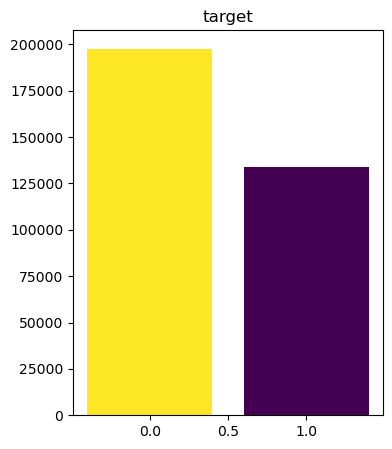

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(4, 5)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

hist = data.groupby('target')['target'].count().sort_values()
ax_1 = fig.add_subplot(1,1,1)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks()
plt.title('target')



### We see Class Imbalance

In [20]:
Count_1 = data[data['target']==1].shape[0]
Count_0 = data[data['target']==0].shape[0]
print(f'Count target 1 = {Count_1}')
print(f'Count target 0 = {Count_0}')
print(f'Rate = {Count_0 / Count_1:.3}')

Count target 1 = 133956
Count target 0 = 197716
Rate = 1.48


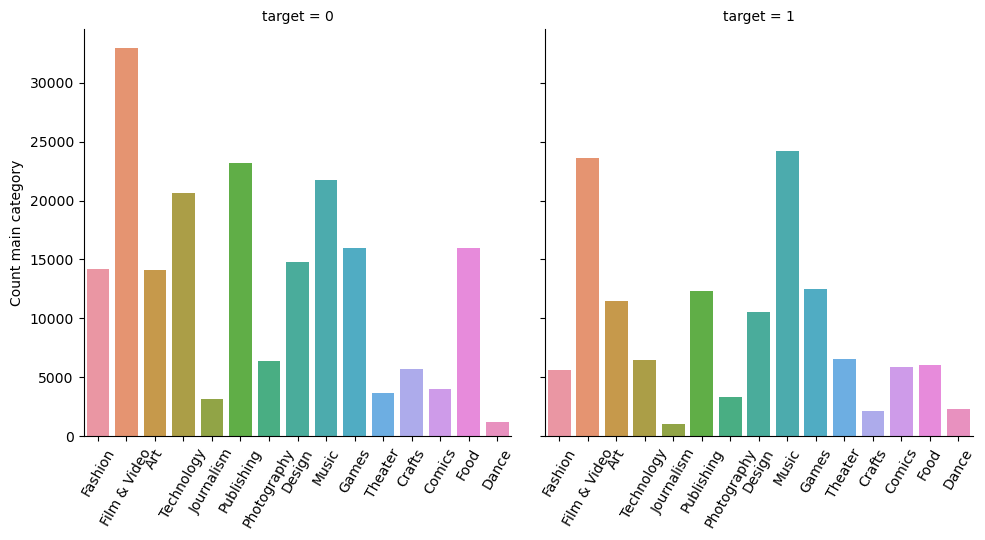

In [83]:
g = sns.catplot(x='Main_category', kind='count', col='target', data=data)
g.set_xticklabels(rotation=60)
g.set_axis_labels("", "Count main category")

- We see differences in subcategories depending on the target. 
- In most cases there are more successes than failed.
- However, some categories: Theaters, Comics and Dance - more success
* In the graph below we can see a similar picture for subcategories

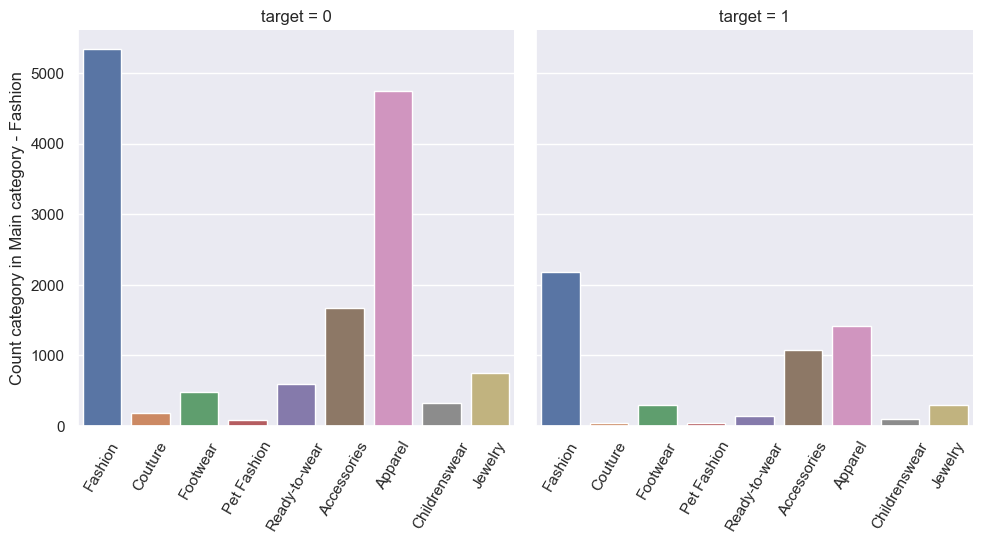

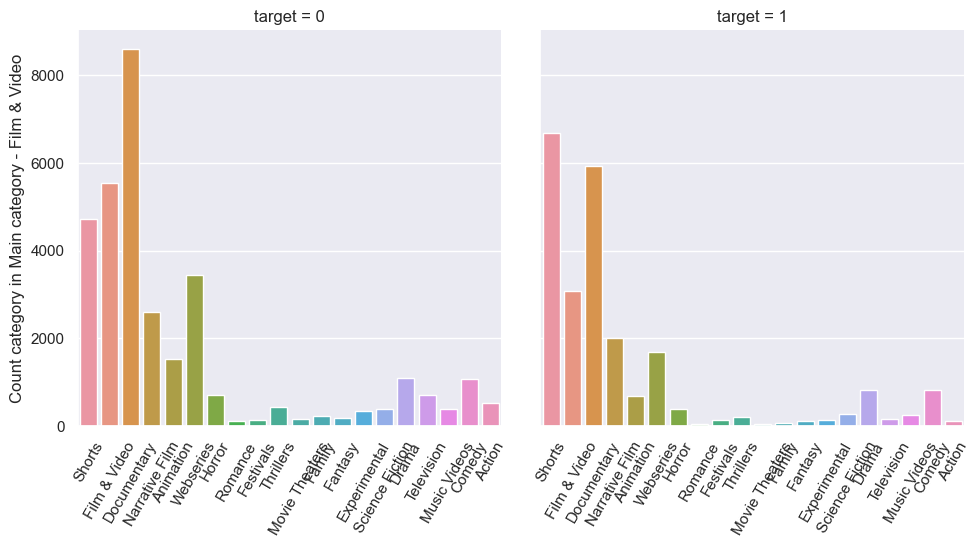

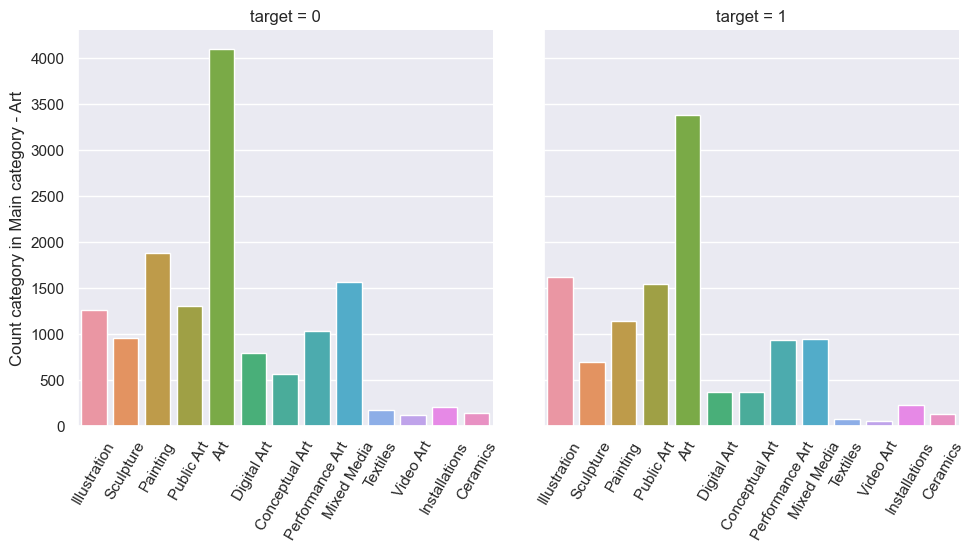

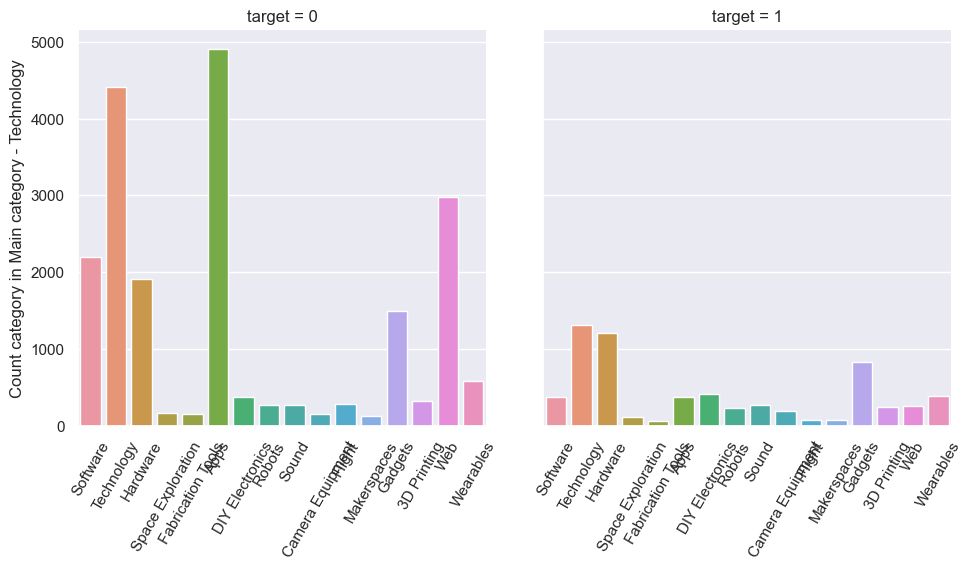

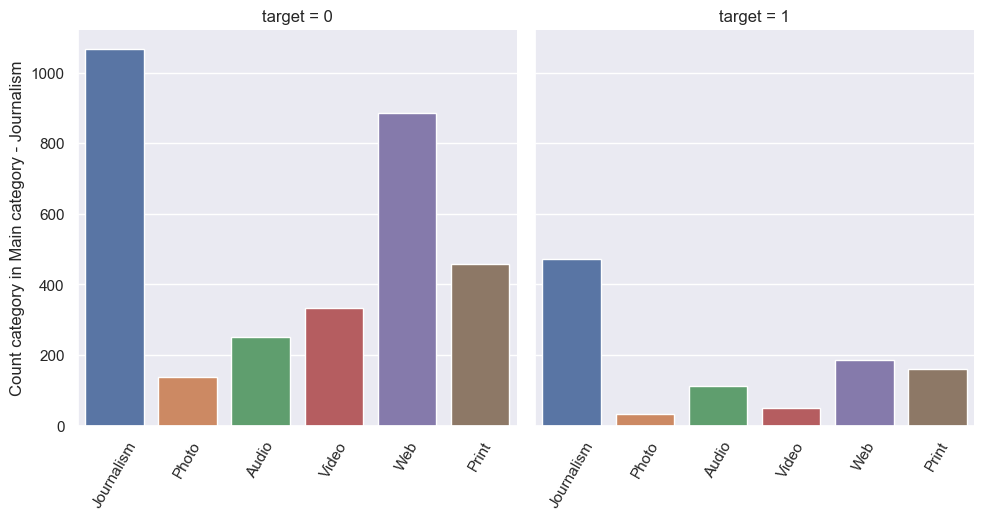

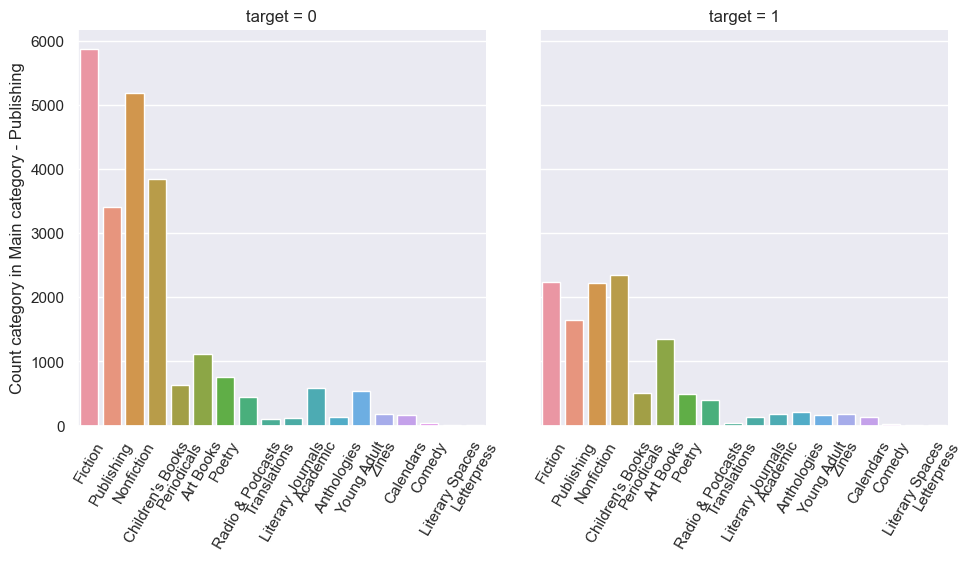

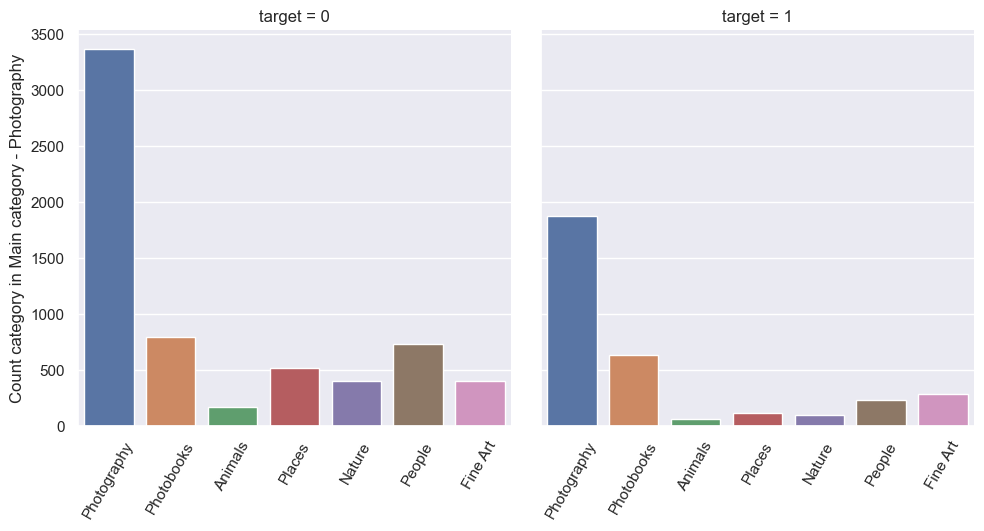

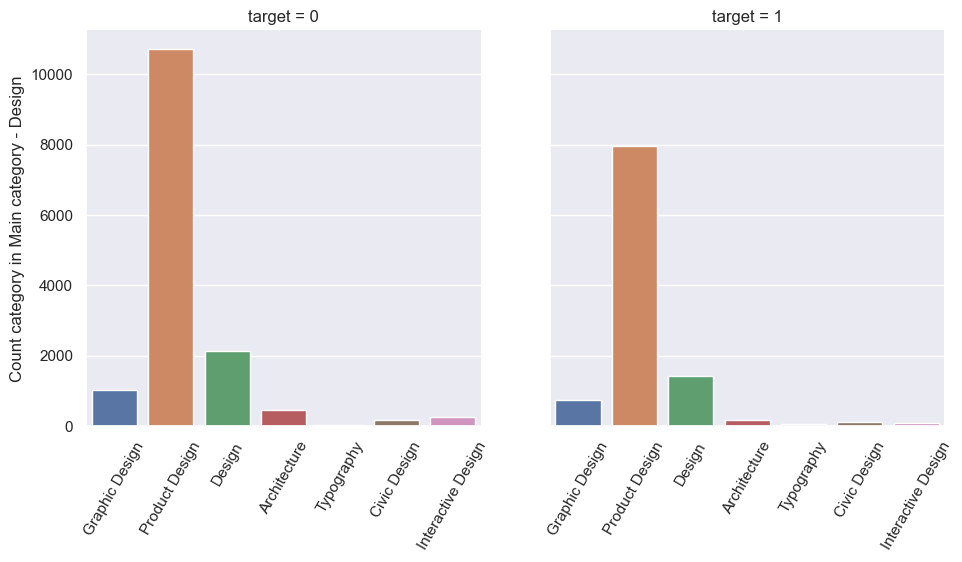

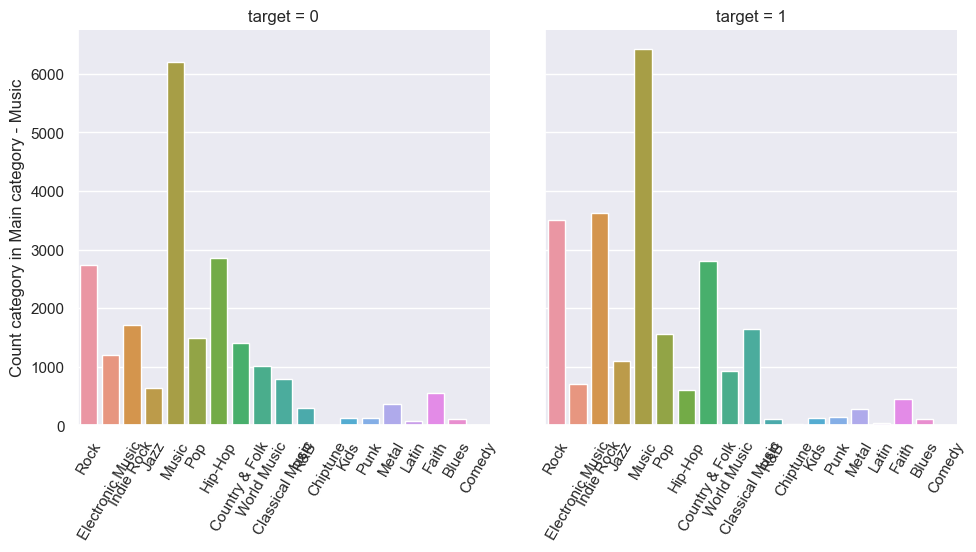

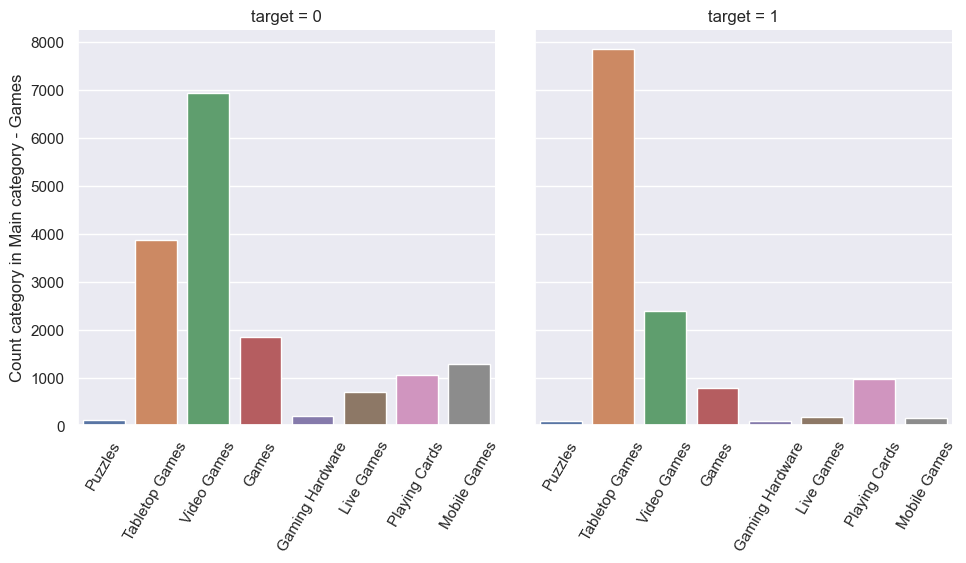

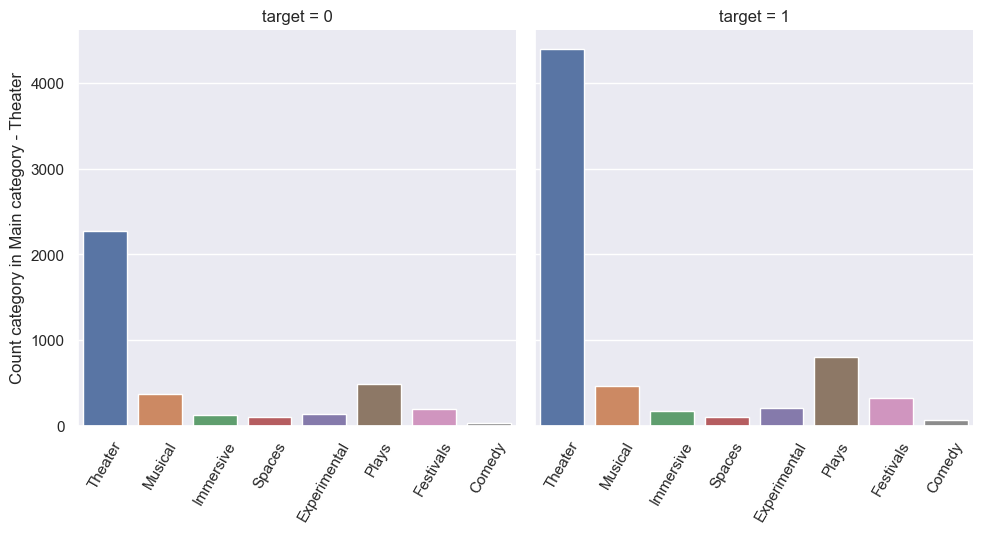

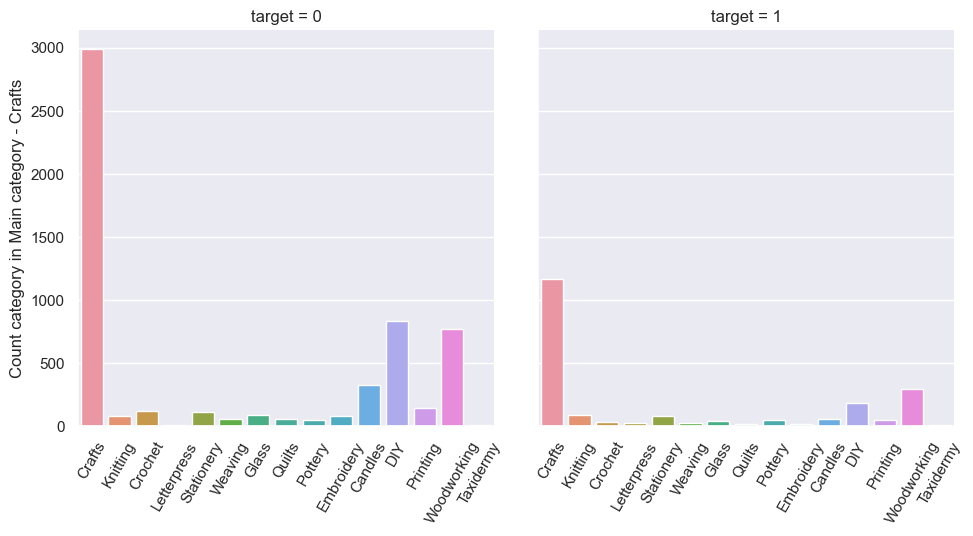

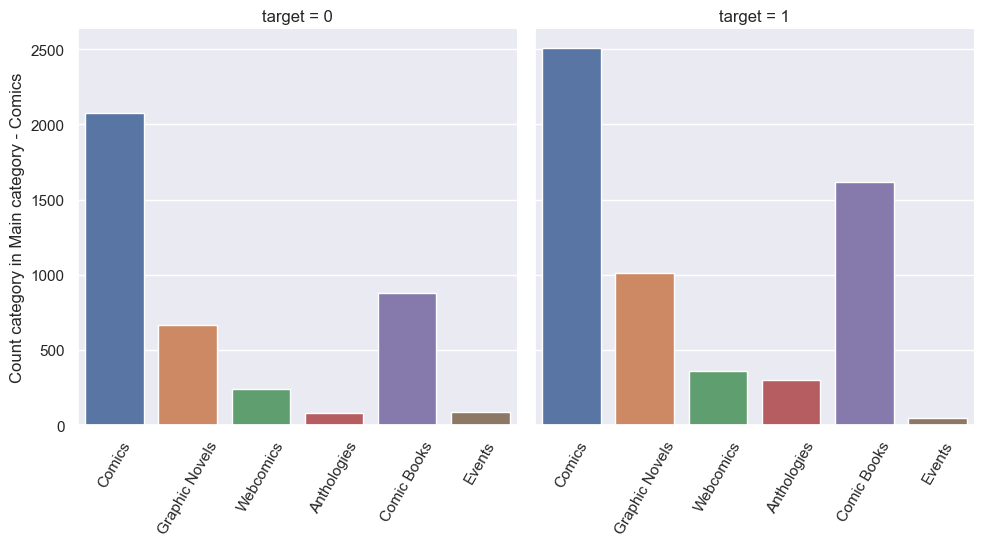

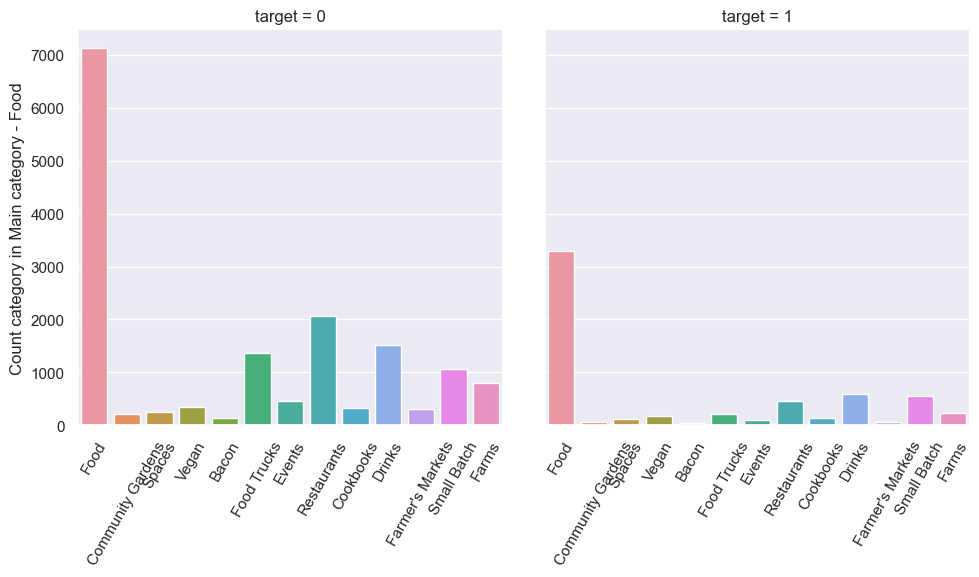

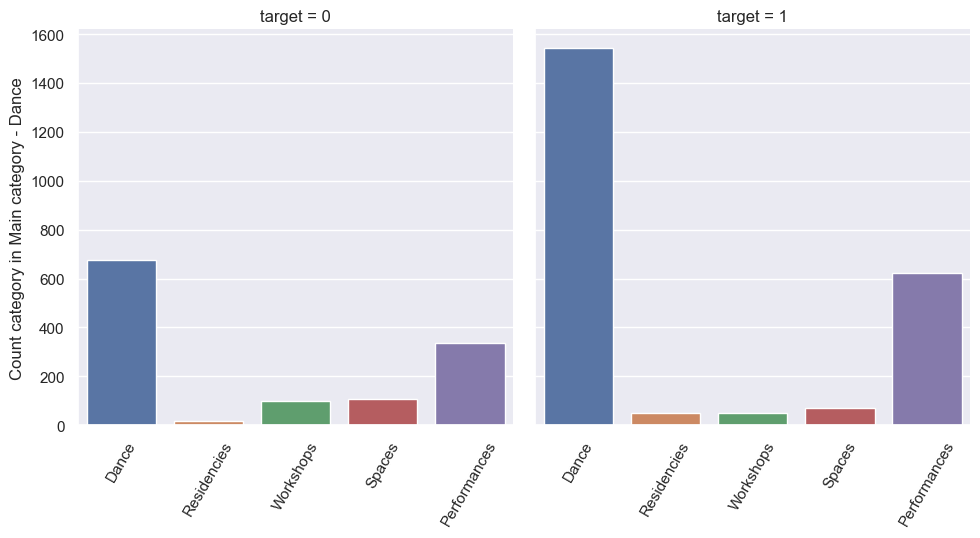

In [91]:
for i in data['Main_category'].unique():
    g = sns.catplot(x='Category', kind='count', col='target', data=data[data['Main_category']==f'{i}'])
    g.set_xticklabels(rotation=60)
    g.set_axis_labels("", f"Count category in Main category - {i}")

- Let's see on countries and currency:
- We see the same distribution of successes and failed

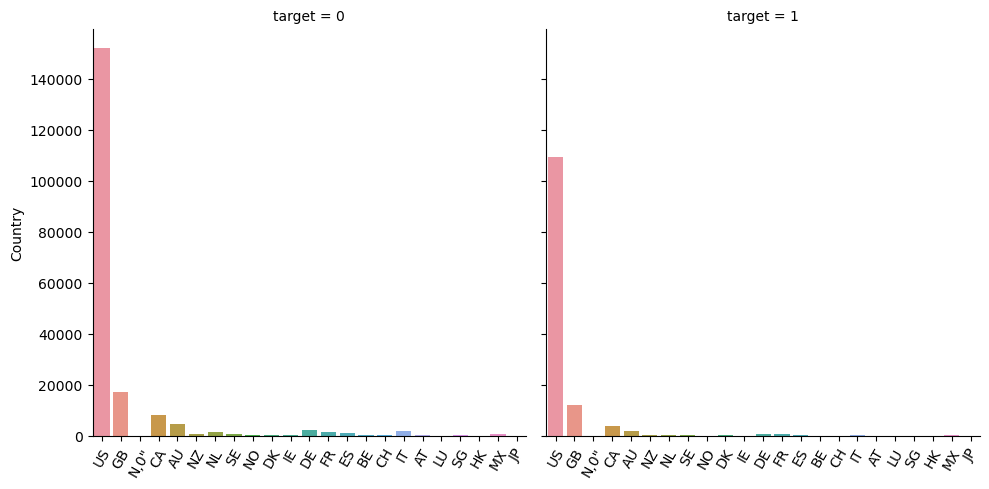

In [22]:
g = sns.catplot(x='Country', kind='count', col='target', data=data)
g.set_xticklabels(rotation=60)
g.set_axis_labels("", "Country")

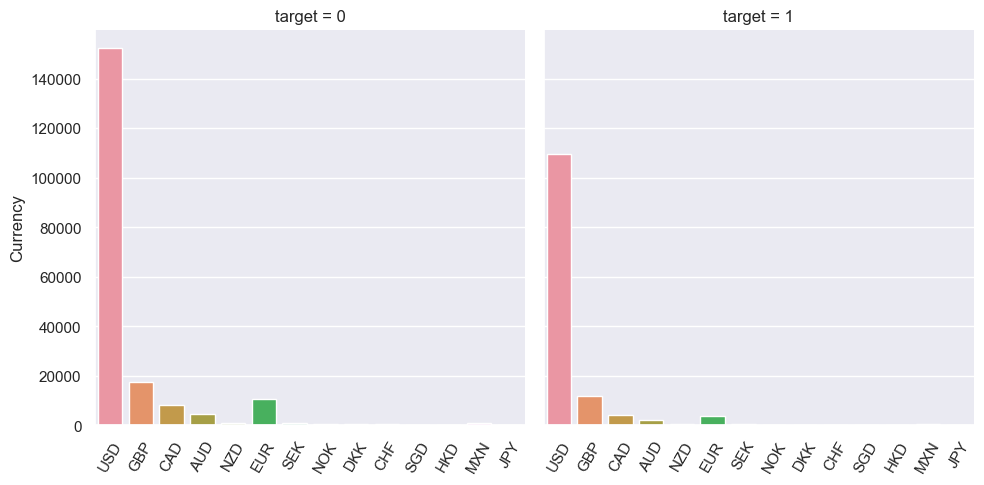

In [93]:
g = sns.catplot(x='Currency', kind='count', col='target', data=data)
g.set_xticklabels(rotation=60)
g.set_axis_labels("", "Currency")

Text(0.5, 1.0, 'target = 1')

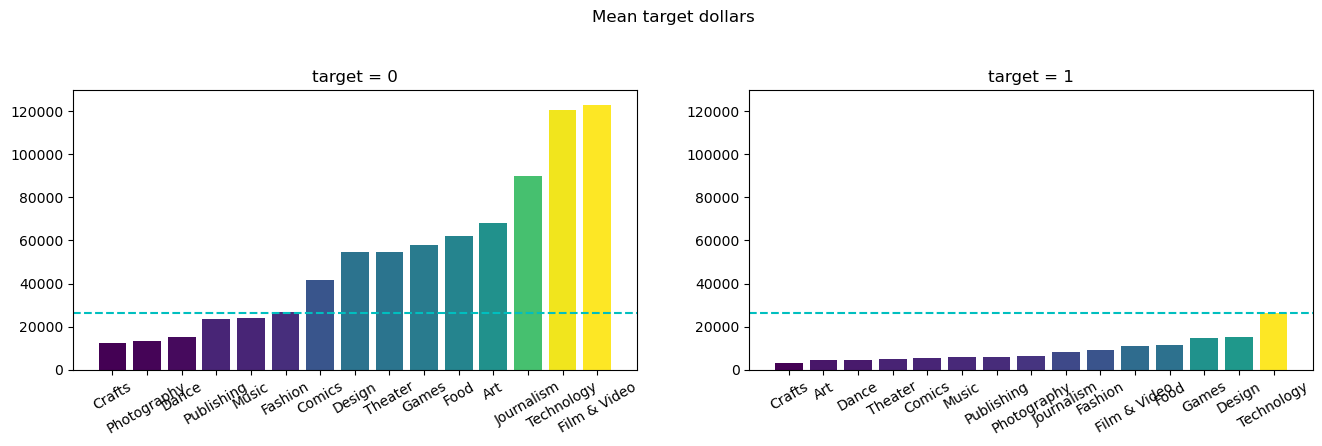

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(16, 8)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

fig.suptitle('Mean target dollars')
hist_1 = data[data['target']==0].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_1 = fig.add_subplot(2,2,1)
ax_1.axhline(y=hist_2['Technology'], color='c', linestyle='--')
plt.bar(hist_1.index, hist_1.values, color=my_cmap(rescale(hist_1.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,130000)
plt.title('target = 0')

hist_2 = data[data['target']==1].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_2 = fig.add_subplot(2,2,2)
ax_2.axhline(y=hist_2['Technology'], color='c', linestyle='--')
plt.bar(hist_2.index, hist_2.values, color=my_cmap(rescale(hist_2.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,130000)
plt.title('target = 1')


Above we can see that on average, with a dollar target of more than 20,000, most often it does not reach the goal

Text(0.5, 1.0, 'target = 1')

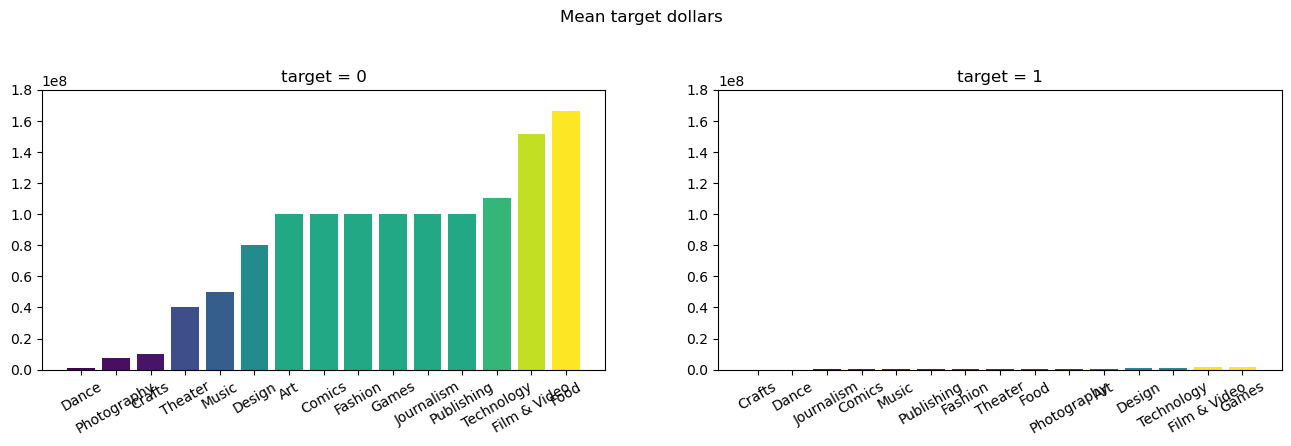

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(16, 8)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

fig.suptitle('Mean target dollars')
hist_1 = data[data['target']==0].groupby('Main_category')['Target_dollars'].max().sort_values()
ax_1 = fig.add_subplot(2,2,1)
#ax_1.axhline(y=hist_2['Technology'], color='c', linestyle='--')
plt.bar(hist_1.index, hist_1.values, color=my_cmap(rescale(hist_1.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,180000000)
plt.title('target = 0')

hist_2 = data[data['target']==1].groupby('Main_category')['Target_dollars'].max().sort_values()
ax_2 = fig.add_subplot(2,2,2)
#ax_2.axhline(y=hist_2['Technology'], color='c', linestyle='--')
plt.bar(hist_2.index, hist_2.values, color=my_cmap(rescale(hist_2.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,180000000)
plt.title('target = 1')

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set_size_inches(16, 8)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
my_cmap = plt.get_cmap("viridis")

fig.suptitle('Overall Title')
hist = data[data['target']==0].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_1 = fig.add_subplot(2,2,1)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks(rotation=30)
plt.ylim(0.0,0.9 )
plt.title('target = 0')

hist = data[data['target']==1].groupby('Main_category')['Target_dollars'].mean().sort_values()
ax_1 = fig.add_subplot(2,2,2)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks(rotation=30)
plt.title('target = 1')

fig. tight_layout (h_pad= 2 )
fig.suptitle('Overall Title')
hist = data[data['target']==0].groupby('Main_category')['Target_dollars'].sum().sort_values()
ax_1 = fig.add_subplot(2,2,3)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks(rotation=30)
plt.title('target = 0')


hist = data[data['target']==1].groupby('Main_category')['Target_dollars'].sum().sort_values()
ax_1 = fig.add_subplot(2,2,4)
plt.bar(hist.index, hist.values, color=my_cmap(rescale(hist.values)))
plt.xticks(rotation=30)
plt.title('target = 1')

In [30]:
data[data['target']==0]

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year,Close_brent
176128,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.00,1000.00,0,39,2009,34.41
241929,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,3,US,22.00,80000.00,0,87,2009,34.41
181197,Pantshirts,Fashion,Fashion,USD,10,US,387.00,1900.00,0,28,2009,34.41
226543,Web Site for Short Horror Film,Shorts,Film & Video,USD,3,US,41.00,200.00,0,29,2009,34.41
28158,Smogr Alert Field Recording,Graphic Design,Design,USD,3,US,41.00,640.00,0,65,2009,34.41
...,...,...,...,...,...,...,...,...,...,...,...,...
156722,Savage in Limbo,Theater,Theater,CAD,2,CA,159.87,2398.08,0,12,2017,63.80
101625,Center Touching Center - A Book of Poetry,Publishing,Publishing,USD,0,US,0.00,3700.00,0,8,2017,63.80
200256,No Label In Home Studio - The Future of Music,Music,Music,USD,0,US,0.00,3500.00,0,10,2017,64.56
318061,No Fix?,Documentary,Film & Video,USD,0,US,0.00,20000.00,0,11,2017,64.56


In [23]:
ratio_successful_failed = data \
    .groupby(['Main_category'])['target']\
    .agg(successful = lambda x: (x==1).sum(),
         failed = lambda x: (x==0).sum())

In [24]:
ratio_successful_failed['ratio_successful_failed'] = ratio_successful_failed.successful / ratio_successful_failed.failed
ratio_successful_failed = ratio_successful_failed.drop(columns=['successful','failed'])

In [25]:
ratio_successful_failed.head()

,ratio_successful_failed
Main_category,
Art,0.814579
Comics,1.447473
Crafts,0.370857
Dance,1.893117
Design,0.712164


In [26]:
user_data_new = data.merge(ratio_successful_failed, on='Main_category', how='inner')

In [27]:
#work with text
user_data_new['name_length'] = user_data_new['Name'].apply(lambda x: len(x) if isinstance(x, str) else x=='0')

In [28]:
user_data_new.head()

,Name,Category,Main_category,Currency,Investor,Country,Collected_dollars,Target_dollars,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length
0,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,30,US,625.0,1000.0,0.0,39,2009,34.41,0.394373,59
1,Pantshirts,Fashion,Fashion,USD,10,US,387.0,1900.0,0.0,28,2009,34.41,0.394373,10
2,Shirt Design by Kevin Cornell - Limited Run of...,Fashion,Fashion,USD,7,US,225.0,1600.0,0.0,88,2009,34.41,0.394373,50
3,The Square Project,Fashion,Fashion,USD,54,US,6862.0,5000.0,1.0,48,2009,34.41,0.394373,18
4,Tees for the Literate,Fashion,Fashion,USD,4,US,150.0,1500.0,0.0,59,2009,34.41,0.394373,21


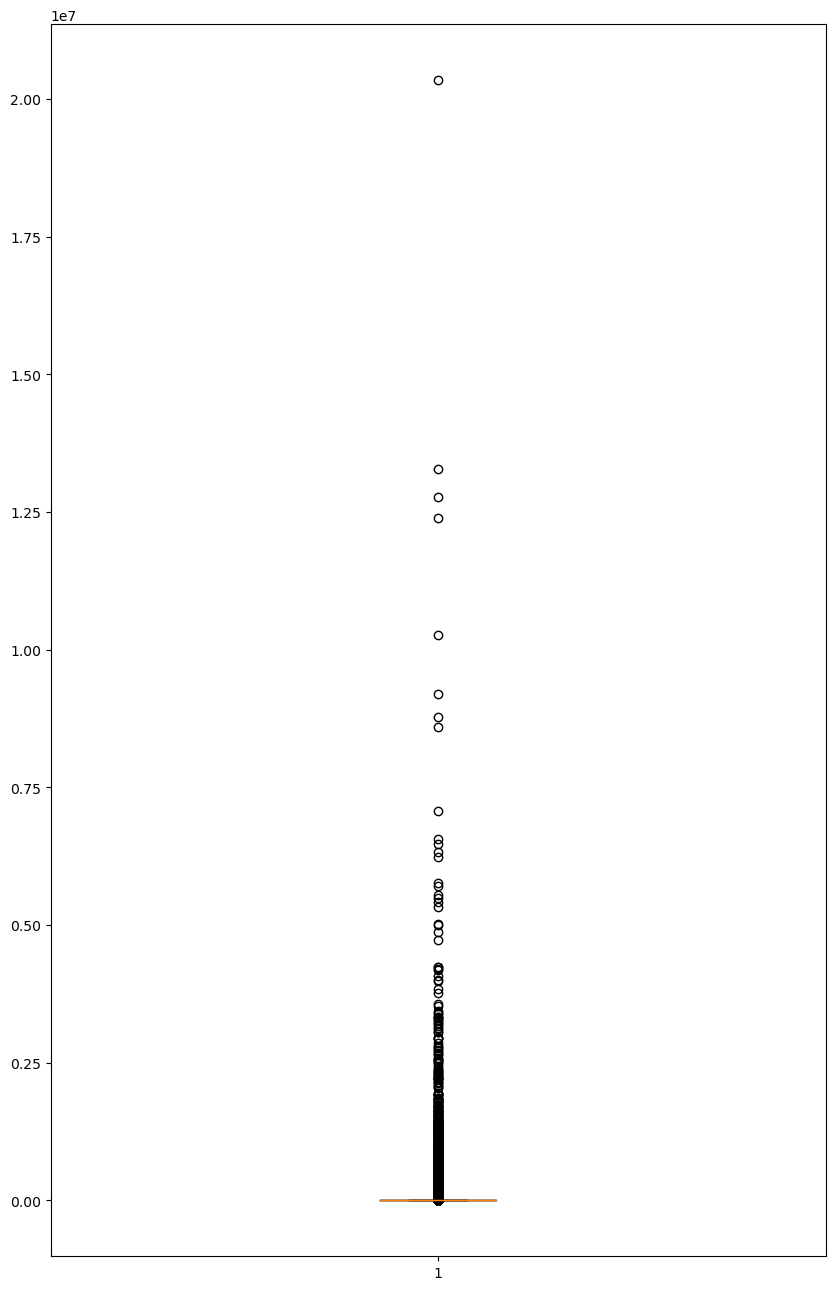

In [29]:
### Нарисуем ящик с усами
from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(user_data_new['Collected_dollars'].values)

plt.show()


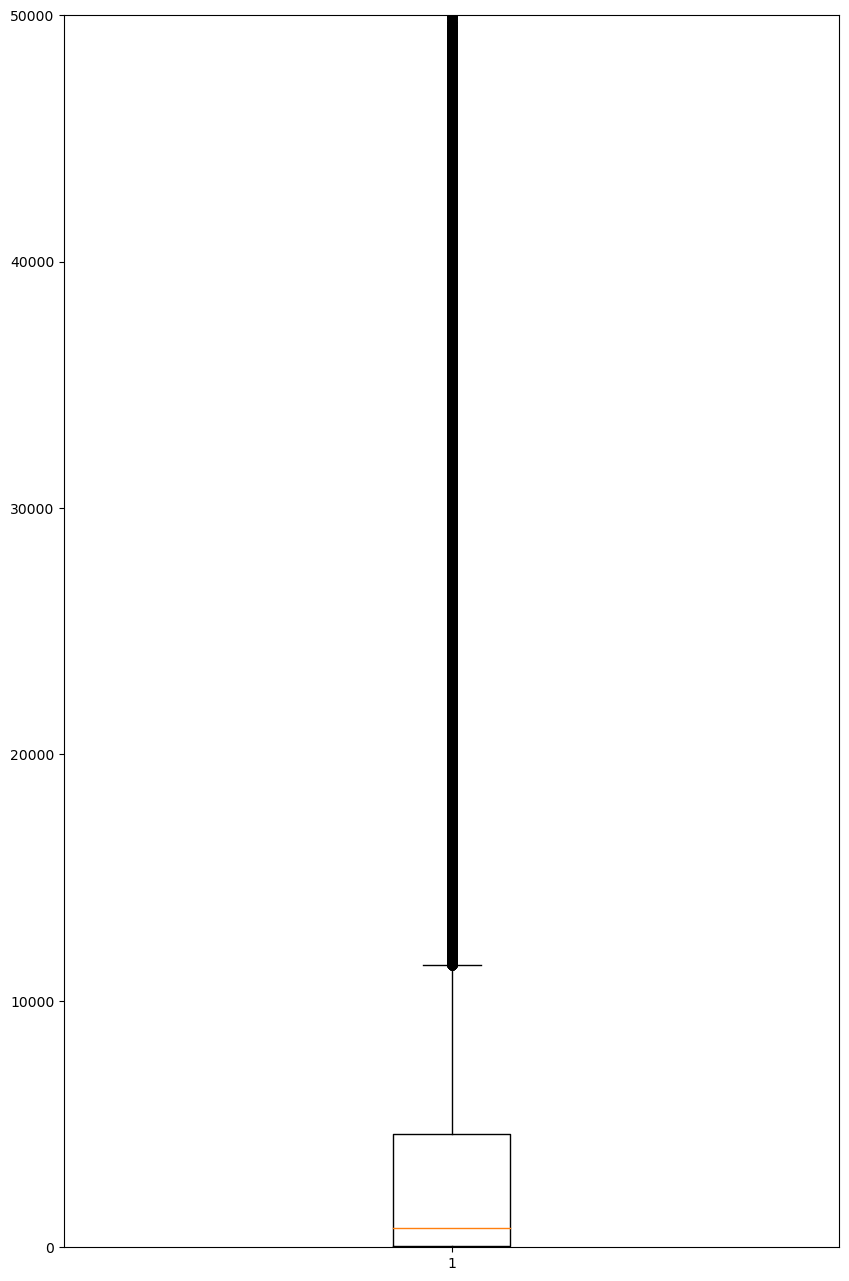

In [30]:

from matplotlib import pyplot as plt

fig = plt.figure()

fig.set_size_inches((10, 16))

plt.boxplot(user_data_new['Collected_dollars'].values)
plt.ylim(0, 50000)

plt.show()

In [31]:
q_low = user_data_new['Collected_dollars'].quantile(0.25)
q_high = user_data_new['Collected_dollars'].quantile(0.75)
tentacle_length = q_high - q_low

upper_tentacle = q_high + 3 * tentacle_length

In [32]:
user_data_new = user_data_new[user_data_new['Collected_dollars']<upper_tentacle]

In [33]:
user_data_new = user_data_new.drop(columns = ['Investor', 'Name', 'Collected_dollars', 'Target_dollars'])

In [34]:
user_data_new

,Category,Main_category,Currency,Country,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length
0,Fashion,Fashion,USD,US,0.0,39,2009,34.41,0.394373,59
1,Fashion,Fashion,USD,US,0.0,28,2009,34.41,0.394373,10
2,Fashion,Fashion,USD,US,0.0,88,2009,34.41,0.394373,50
3,Fashion,Fashion,USD,US,1.0,48,2009,34.41,0.394373,18
4,Fashion,Fashion,USD,US,0.0,59,2009,34.41,0.394373,21
...,...,...,...,...,...,...,...,...,...,...
331667,Dance,Dance,GBP,GB,0.0,29,2017,62.63,1.893117,51
331668,Spaces,Dance,USD,US,1.0,31,2017,62.63,1.893117,16
331669,Performances,Dance,USD,US,1.0,29,2017,63.73,1.893117,25
331670,Performances,Dance,USD,US,1.0,29,2017,63.73,1.893117,50


In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
categorical_columns = user_data_new.loc[:,user_data_new.dtypes==np.object].columns
user_data_new[categorical_columns].head(2)

C:\Users\79832\AppData\Local\Temp\ipykernel_6308\1459166396.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = user_data_new.loc[:,user_data_new.dtypes==np.object].columns


,Category,Main_category,Currency,Country
0,Fashion,Fashion,USD,US
1,Fashion,Fashion,USD,US


In [37]:
numeric_columns = user_data_new.loc[:,user_data_new.dtypes!=np.object].columns
user_data_new[numeric_columns].head(2)

C:\Users\79832\AppData\Local\Temp\ipykernel_6308\6733163.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numeric_columns = user_data_new.loc[:,user_data_new.dtypes!=np.object].columns


,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length
0,0.0,39,2009,34.41,0.394373,59
1,0.0,28,2009,34.41,0.394373,10


In [38]:
for col in categorical_columns:
    if user_data_new[col].nunique() <= 20:
        one_hot = pd.get_dummies(user_data_new[col], prefix=col, drop_first=True)
        user_data_new = pd.concat((user_data_new.drop(col, axis=1), one_hot), axis=1)
        
    else:
        mean_target = user_data_new.groupby(col)['target'].mean()
        user_data_new[col] = user_data_new[col].map(mean_target)

In [39]:
user_data_new

,Category,Country,target,Term,Publication_year,Close_brent,ratio_successful_failed,name_length,Main_category_Comics,Main_category_Crafts,...,Currency_EUR,Currency_GBP,Currency_HKD,Currency_JPY,Currency_MXN,Currency_NOK,Currency_NZD,Currency_SEK,Currency_SGD,Currency_USD
0,0.242916,0.370715,0.0,39,2009,34.41,0.394373,59,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.242916,0.370715,0.0,28,2009,34.41,0.394373,10,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.242916,0.370715,0.0,88,2009,34.41,0.394373,50,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.242916,0.370715,1.0,48,2009,34.41,0.394373,18,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.242916,0.370715,0.0,59,2009,34.41,0.394373,21,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331667,0.688971,0.371381,0.0,29,2017,62.63,1.893117,51,0,0,...,0,1,0,0,0,0,0,0,0,0
331668,0.298462,0.370715,1.0,31,2017,62.63,1.893117,16,0,0,...,0,0,0,0,0,0,0,0,0,1
331669,0.641870,0.370715,1.0,29,2017,63.73,1.893117,25,0,0,...,0,0,0,0,0,0,0,0,0,1
331670,0.641870,0.370715,1.0,29,2017,63.73,1.893117,50,0,0,...,0,0,0,0,0,0,0,0,0,1


## Определимся с таргетом

In [40]:
### Разделим данные на объекты и ответы

X = user_data_new.drop('target', axis=1)
Y = user_data_new['target']

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    random_state=0,
                                                    shuffle=False, #предварительно сортировали по дате
                                                    test_size=0.2)

In [43]:
(y_train==0).sum(), (y_train==1).sum()

(158689, 84477)

In [44]:
(y_train==0).sum()/(y_train==1).sum()

1.8784876356878204

#### Let's train 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [46]:
#MODEL
model_LR = LogisticRegression(random_state=42, max_iter=1000)
model_SVC= LinearSVC(random_state=42, max_iter=1000) 
model_CB = CatBoostClassifier(random_state=42, verbose=0)
model_GB = GradientBoostingClassifier(random_state=42, verbose=0)
model_DT = DecisionTreeClassifier(random_state=42)
model_RF = RandomForestClassifier(random_state=42, verbose=0)
model_StS = StandardScaler()


models = [model_LR,model_SVC,model_CB,model_GB,model_DT,model_RF]
name_models = [i.__class__.__name__ for i in models]

In [47]:
def learn_model(models):
    results_train = []
    results_test = []
    for model  in models:
        model.fit(X_train, y_train)
        score_train = roc_auc_score(y_train, model.predict(X_train))
        score_test = roc_auc_score(y_test, model.predict(X_test))
        results_train.append(score_train)
        results_test.append(score_test)
        print(f'{model.__class__.__name__} ROC_AUC: train - {score_train:.3f} test - {score_test:.3f}')
    return results_train, results_test

In [48]:
results_train, results_test = learn_model(models)

LogisticRegression ROC_AUC: train - 0.611 test - 0.692


C:\Users\79832\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC ROC_AUC: train - 0.585 test - 0.673
CatBoostClassifier ROC_AUC: train - 0.649 test - 0.689
GradientBoostingClassifier ROC_AUC: train - 0.626 test - 0.685
DecisionTreeClassifier ROC_AUC: train - 0.881 test - 0.608
RandomForestClassifier ROC_AUC: train - 0.890 test - 0.661


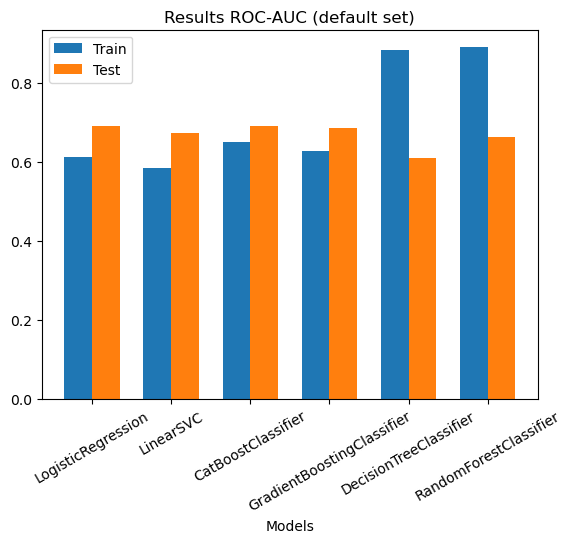

In [49]:
import matplotlib.pyplot as plt


bar_width = 0.35
index = np.arange(len(name_models))


plt.bar(index, results_train, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test, width=bar_width, label='Test')


plt.title('Results ROC-AUC (default set)')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)


plt.legend()


plt.show()

In [50]:
def learn_model_SC(models):
    results_train = []
    results_test = []
    for model  in models:
        pipe = Pipeline([('scaler', StandardScaler()), ('LR', model)])
        pipe.fit(X_train, y_train)
        score_train = roc_auc_score(y_train, pipe.predict(X_train))
        score_test = roc_auc_score(y_test, pipe.predict(X_test))
        results_train.append(score_train)
        results_test.append(score_test)
        print(f'{model.__class__.__name__} ROC_AUC: train - {score_train:.3f} test - {score_test:.3f}')
    return results_train, results_test


In [51]:
results_train_SC,results_test_SC = learn_model_SC(models)

LogisticRegression ROC_AUC: train - 0.613 test - 0.685


C:\Users\79832\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC ROC_AUC: train - 0.611 test - 0.682
CatBoostClassifier ROC_AUC: train - 0.649 test - 0.689
GradientBoostingClassifier ROC_AUC: train - 0.626 test - 0.685
DecisionTreeClassifier ROC_AUC: train - 0.881 test - 0.609
RandomForestClassifier ROC_AUC: train - 0.890 test - 0.661


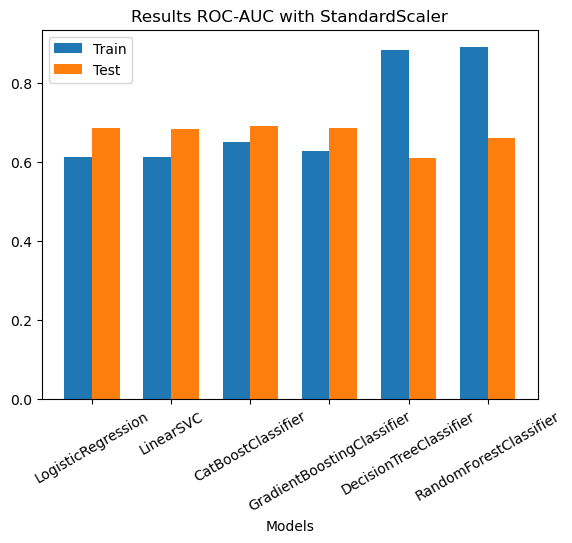

In [52]:
import matplotlib.pyplot as plt


bar_width = 0.35
index = np.arange(len(name_models))


plt.bar(index, results_train_SC, width=bar_width, label='Train')
plt.bar(index + bar_width, results_test_SC, width=bar_width, label='Test')


plt.title('Results ROC-AUC with StandardScaler')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)


plt.legend()


plt.show()

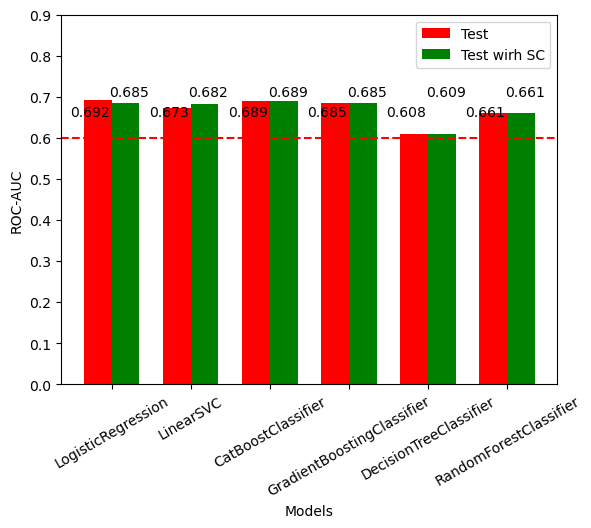

In [89]:
import matplotlib.pyplot as plt


bar_width = 0.35

index = np.arange(len(name_models))


plt.bar(index, results_test, width=bar_width, label='Test', color='red')
plt.bar(index + bar_width, results_test_SC, width=bar_width, label='Test wirh SC', color='green')


plt.ylabel('ROC-AUC')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, name_models, rotation=30)
plt.ylim(0.0,0.9 )
plt.axhline (y=0.6, color='red', linestyle='--')
plt.legend()

for i, n in  enumerate(results_test):
    plt.annotate(str(round(results_test_SC[i],3)), (index[i]+0.4, results_test_SC[0]+0.01), ha='center', va='bottom')
    plt.annotate(str(round(results_test[i],3)), (index[i]-0.1, results_test_SC[0]-0.04), ha='center', va='bottom')

plt.show()

In [98]:
y_train[y_train==1].shape[0]

84477

In [99]:
Count_1 = y_train[y_train==1].shape[0]
Count_0 = y_train[y_train==0].shape[0]
print(f'Count target 1 = {Count_1}')
print(f'Count target 0 = {Count_0}')
print(f'Rate = {Count_0 / Count_1:.3}')

Count target 1 = 84477
Count target 0 = 158689
Rate = 1.88


In [103]:

splitter = TimeSeriesSplit(n_splits=5) 
pipe_LR = Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression(random_state=42, max_iter=1000,class_weight={0:1.0,1:1.88}))])
param_grid_LR = {'LR__C':  np.linspace(0.000001, 0.1, 20)}

### Передадим в GridSearchCV

search_LR = GridSearchCV(pipe_LR,
                      param_grid_LR,
                      cv=splitter,
                      scoring='roc_auc',
                      verbose=10,return_train_score=True)

search_LR.fit(X_train, y_train)

print(f"Best parameter (CV score={search_LR.best_score_:.5f}):")
print(search_LR.best_params_)

print(f"Best parameter finaly test: {search_LR.score(X_test, y_test)}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START LR__C=1e-06................................................
[CV 1/5; 1/20] END LR__C=1e-06;, score=(train=0.660, test=0.638) total time=   0.1s
[CV 2/5; 1/20] START LR__C=1e-06................................................
[CV 2/5; 1/20] END LR__C=1e-06;, score=(train=0.670, test=0.727) total time=   0.2s
[CV 3/5; 1/20] START LR__C=1e-06................................................
[CV 3/5; 1/20] END LR__C=1e-06;, score=(train=0.699, test=0.595) total time=   0.4s
[CV 4/5; 1/20] START LR__C=1e-06................................................
[CV 4/5; 1/20] END LR__C=1e-06;, score=(train=0.675, test=0.686) total time=   0.6s
[CV 5/5; 1/20] START LR__C=1e-06................................................
[CV 5/5; 1/20] END LR__C=1e-06;, score=(train=0.679, test=0.694) total time=   0.7s
[CV 1/5; 2/20] START LR__C=0.0052641052631578955................................
[CV 1/5; 2/20] END LR__C=0.00526

[CV 2/5; 10/20] END LR__C=0.04736894736842106;, score=(train=0.687, test=0.745) total time=   0.2s
[CV 3/5; 10/20] START LR__C=0.04736894736842106.................................
[CV 3/5; 10/20] END LR__C=0.04736894736842106;, score=(train=0.719, test=0.618) total time=   0.4s
[CV 4/5; 10/20] START LR__C=0.04736894736842106.................................
[CV 4/5; 10/20] END LR__C=0.04736894736842106;, score=(train=0.697, test=0.706) total time=   0.5s
[CV 5/5; 10/20] START LR__C=0.04736894736842106.................................
[CV 5/5; 10/20] END LR__C=0.04736894736842106;, score=(train=0.703, test=0.725) total time=   0.7s
[CV 1/5; 11/20] START LR__C=0.052632052631578954................................
[CV 1/5; 11/20] END LR__C=0.052632052631578954;, score=(train=0.681, test=0.677) total time=   0.1s
[CV 2/5; 11/20] START LR__C=0.052632052631578954................................
[CV 2/5; 11/20] END LR__C=0.052632052631578954;, score=(train=0.687, test=0.745) total time=   0.2s

[CV 3/5; 19/20] END LR__C=0.09473689473684212;, score=(train=0.719, test=0.618) total time=   0.4s
[CV 4/5; 19/20] START LR__C=0.09473689473684212.................................
[CV 4/5; 19/20] END LR__C=0.09473689473684212;, score=(train=0.697, test=0.706) total time=   0.6s
[CV 5/5; 19/20] START LR__C=0.09473689473684212.................................
[CV 5/5; 19/20] END LR__C=0.09473689473684212;, score=(train=0.703, test=0.725) total time=   0.8s
[CV 1/5; 20/20] START LR__C=0.1.................................................
[CV 1/5; 20/20] END LR__C=0.1;, score=(train=0.681, test=0.677) total time=   0.1s
[CV 2/5; 20/20] START LR__C=0.1.................................................
[CV 2/5; 20/20] END LR__C=0.1;, score=(train=0.687, test=0.745) total time=   0.2s
[CV 3/5; 20/20] START LR__C=0.1.................................................
[CV 3/5; 20/20] END LR__C=0.1;, score=(train=0.719, test=0.618) total time=   0.4s
[CV 4/5; 20/20] START LR__C=0.1..................

In [104]:
def plot_validation_curves(param_values, grid_cv_results_):
    train, test = grid_cv_results_['mean_train_score'], grid_cv_results_['mean_test_score']
    train_line = plt.plot(param_values, train, '-', label='train', color='green')
    valid_line = plt.plot(param_values, test, '-', label='test', color='red')

    plt.legend()

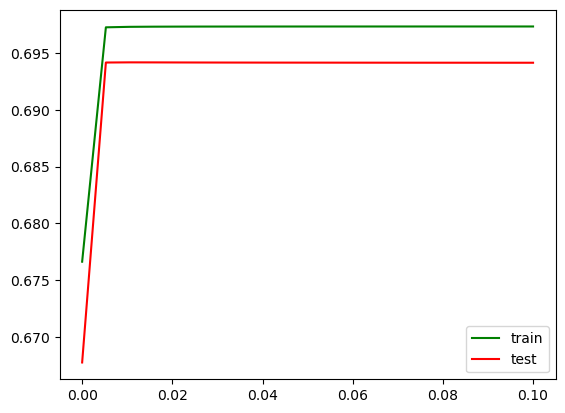

In [105]:
plot_validation_curves(param_grid_LR['LR__C'], search_LR.cv_results_)

In [107]:
model_LR.get_params()

{'C': 0.0105,
 'class_weight': {0: 1.0, 1: 1.88},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [106]:
model_LR.set_params(**{'C':0.0105, 'class_weight': {0:1.0,1:1.88}})

LogisticRegression(C=0.0105, class_weight={0: 1.0, 1: 1.88}, max_iter=1000,
                   random_state=42)

In [111]:
splitter = TimeSeriesSplit(n_splits=5) 
pipe_CB = Pipeline([('scaler', StandardScaler()), ('CB', CatBoostClassifier(random_state=42, verbose=0, class_weights={0:1.0,1:1.88}))])
param_grid_CB = {'CB__depth': [6, 8, 10, 12],
                 'CB__l2_leaf_reg':[3, 5, 6, 8]}

### Передадим в GridSearchCV

search_CB = GridSearchCV(pipe_CB,
                      param_grid_CB,
                      cv=splitter,
                      scoring='roc_auc',
                      verbose=15,return_train_score=True)

search_CB.fit(X_train, y_train)

print(f"Best parameter (CV score={search_CB.best_score_:.5f}):")
print(search_CB.best_params_)

print(f"Best parameter finaly test: {search_CB.score(X_test, y_test)}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START CB__depth=6, CB__l2_leaf_reg=3.............................
[CV 1/5; 1/16] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.733, test=0.670) total time=  12.4s
[CV 2/5; 1/16] START CB__depth=6, CB__l2_leaf_reg=3.............................
[CV 2/5; 1/16] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.725, test=0.739) total time=  18.0s
[CV 3/5; 1/16] START CB__depth=6, CB__l2_leaf_reg=3.............................
[CV 3/5; 1/16] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.751, test=0.640) total time=  28.5s
[CV 4/5; 1/16] START CB__depth=6, CB__l2_leaf_reg=3.............................
[CV 4/5; 1/16] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.731, test=0.701) total time=  35.0s
[CV 5/5; 1/16] START CB__depth=6, CB__l2_leaf_reg=3.............................
[CV 5/5; 1/16] END CB__depth=6, CB__l2_leaf_reg=3;, score=(train=0.733, test=0.736) total time=  39.1s
[CV 1/5; 2/16] STAR

[CV 5/5; 9/16] END CB__depth=10, CB__l2_leaf_reg=3;, score=(train=0.758, test=0.723) total time=  57.5s
[CV 1/5; 10/16] START CB__depth=10, CB__l2_leaf_reg=5...........................
[CV 1/5; 10/16] END CB__depth=10, CB__l2_leaf_reg=5;, score=(train=0.779, test=0.656) total time=  33.1s
[CV 2/5; 10/16] START CB__depth=10, CB__l2_leaf_reg=5...........................
[CV 2/5; 10/16] END CB__depth=10, CB__l2_leaf_reg=5;, score=(train=0.761, test=0.728) total time=  38.6s
[CV 3/5; 10/16] START CB__depth=10, CB__l2_leaf_reg=5...........................
[CV 3/5; 10/16] END CB__depth=10, CB__l2_leaf_reg=5;, score=(train=0.780, test=0.632) total time=  45.4s
[CV 4/5; 10/16] START CB__depth=10, CB__l2_leaf_reg=5...........................
[CV 4/5; 10/16] END CB__depth=10, CB__l2_leaf_reg=5;, score=(train=0.759, test=0.695) total time=  51.7s
[CV 5/5; 10/16] START CB__depth=10, CB__l2_leaf_reg=5...........................
[CV 5/5; 10/16] END CB__depth=10, CB__l2_leaf_reg=5;, score=(train=0.75

In [113]:
search_CB.cv_results_['mean_train_score']

array([0.73478896, 0.73418992, 0.73400075, 0.73345504, 0.74971705,
       0.7481578 , 0.74746664, 0.74657574, 0.77070947, 0.76731519,
       0.76635365, 0.76404827, 0.79681733, 0.79159023, 0.78957889,
       0.78640254])

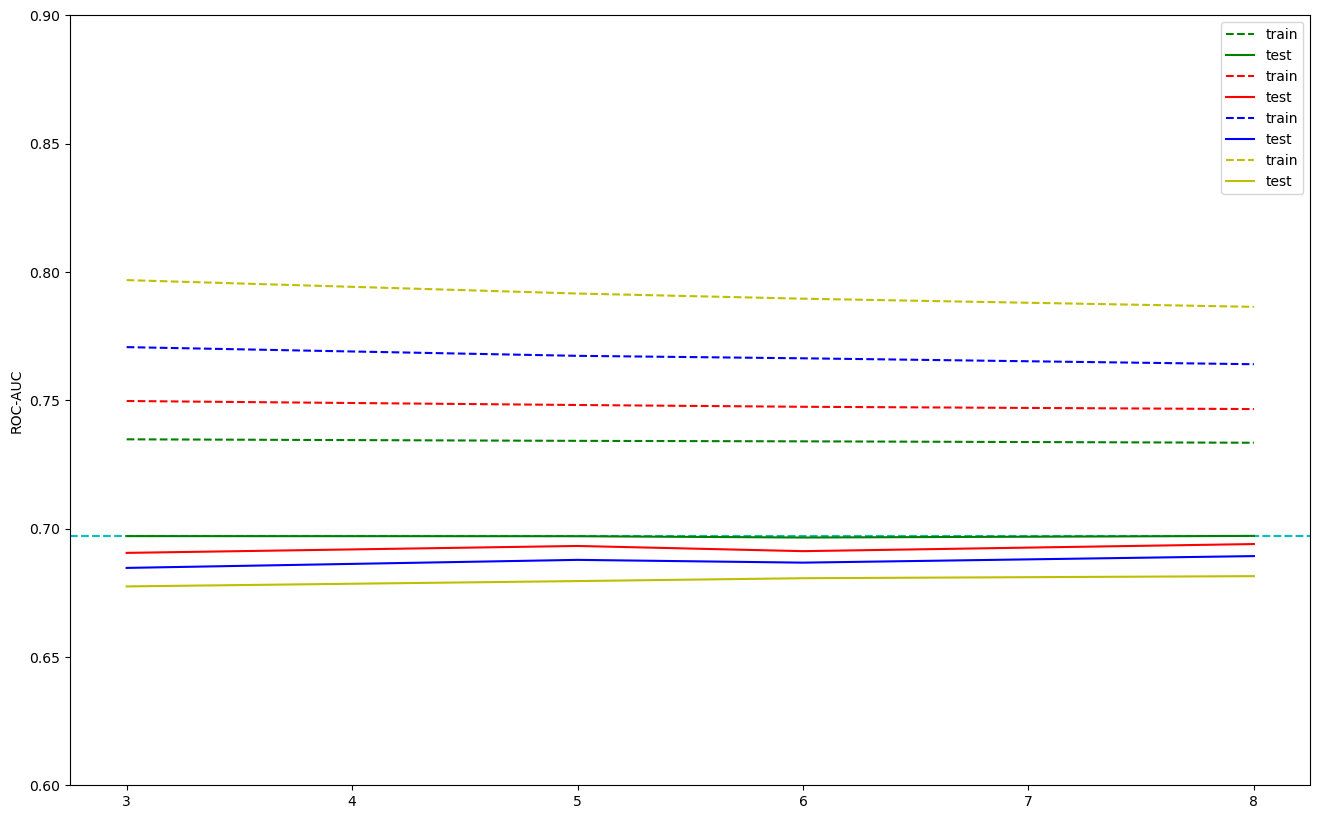

In [124]:
fig = plt.figure()
fig.set_size_inches(16, 10)
plt.ylim(0.6, 0.9)

plt.ylabel('ROC-AUC')
plt.axhline (y=max(search_CB.cv_results_['mean_test_score']), color='c', linestyle='--')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[:4], '--', label='train', color='green')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[:4], '-', label='test', color='green')

plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[4:8], '--', label='train', color='red')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[4:8], '-', label='test', color='red')

plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[8:12], '--', label='train', color='b')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[8:12], '-', label='test', color='b')

plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_train_score'])[12:16], '--', label='train', color='y')
plt.plot(param_grid_CB['CB__l2_leaf_reg'], list(search_CB.cv_results_['mean_test_score'])[12:16], '-', label='test', color='y')

plt.legend()



In [157]:
model_CB.get_params()

{'verbose': 0,
 'random_state': 42,
 'class_weights': {0: 1.0, 1: 1.88},
 'depth': 6,
 'l2_leaf_reg': 8}

In [138]:
model_CB = CatBoostClassifier(random_state=42, verbose=0)

In [140]:
model_CB.set_params(**{'class_weights': {0: 1.0, 1: 1.88}, 'depth': 6, 'l2_leaf_reg': 8})

In [142]:
results_train_with_set,results_test_with_set = learn_model_SC([model_LR, model_CB])

LogisticRegression ROC_AUC: train - 0.651 test - 0.702
CatBoostClassifier ROC_AUC: train - 0.673 test - 0.709


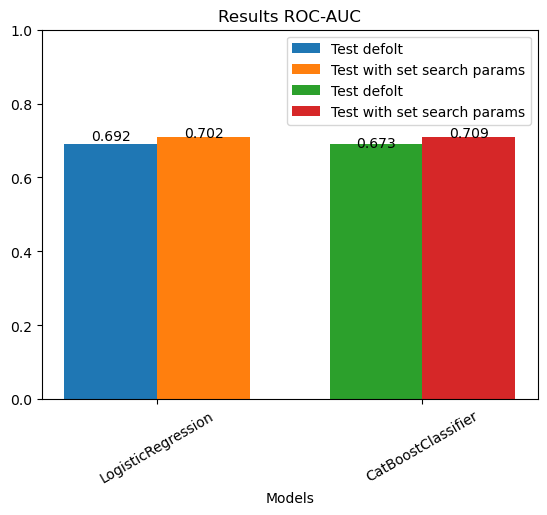

In [198]:

bar_width = 0.35


plt.bar(0, results_test, width=bar_width, label='Test defolt')
plt.bar(0 + bar_width, results_test_with_set, width=bar_width, label='Test with set search params')
plt.bar(1, results_test, width=bar_width, label='Test defolt')
plt.bar(1 + bar_width, results_test_with_set, width=bar_width, label='Test with set search params')

plt.annotate(str(round(results_test[0],3)), (index[0], results_test[0]), ha='center', va='bottom')
plt.annotate(str(round(results_test_with_set[0],3)), (index[0]+0.35, results_test_with_set[0]), ha='center', va='bottom')

plt.annotate(str(round(results_test[1],3)), (index[1], results_test[1]), ha='center', va='bottom')
plt.annotate(str(round(results_test_with_set[1],3)), (index[1]+0.35, results_test_with_set[0]), ha='center', va='bottom')

plt.title('Results ROC-AUC')
plt.xlabel('Models')
plt.xticks(index + bar_width/2, ['LogisticRegression','CatBoostClassifier'], rotation=30)
plt.ylim(0.0, 1)

plt.legend()


plt.show('Train','Test')

In [199]:
# Получение коэффициентов модели
coefficients = model_LR.coef_

# Получение значимости признаков
importance = np.abs(coefficients)

In [200]:
for i, feature in enumerate(X_train.columns):
    print(f"Значимость признака {feature}: {importance[0][i]}")

Значимость признака Category: 0.6402071186255477
Значимость признака Country: 0.21523906543134483
Значимость признака Term: 0.31550878578603225
Значимость признака Publication_year: 0.22778637761879858
Значимость признака Close_brent: 0.1596886199136782
Значимость признака ratio_successful_failed: 0.023878299590703443
Значимость признака name_length: 0.16583209792611495
Значимость признака Main_category_Comics: 0.0
Значимость признака Main_category_Crafts: 0.0
Значимость признака Main_category_Dance: 0.0
Значимость признака Main_category_Design: 0.009943796853151412
Значимость признака Main_category_Fashion: 0.0030295859886637663
Значимость признака Main_category_Film & Video: 0.018787576188734348
Значимость признака Main_category_Food: 0.0
Значимость признака Main_category_Games: 0.031242514807848745
Значимость признака Main_category_Journalism: 0.008571578694735309
Значимость признака Main_category_Music: 0.017966904705998262
Значимость признака Main_category_Photography: 0.007198106

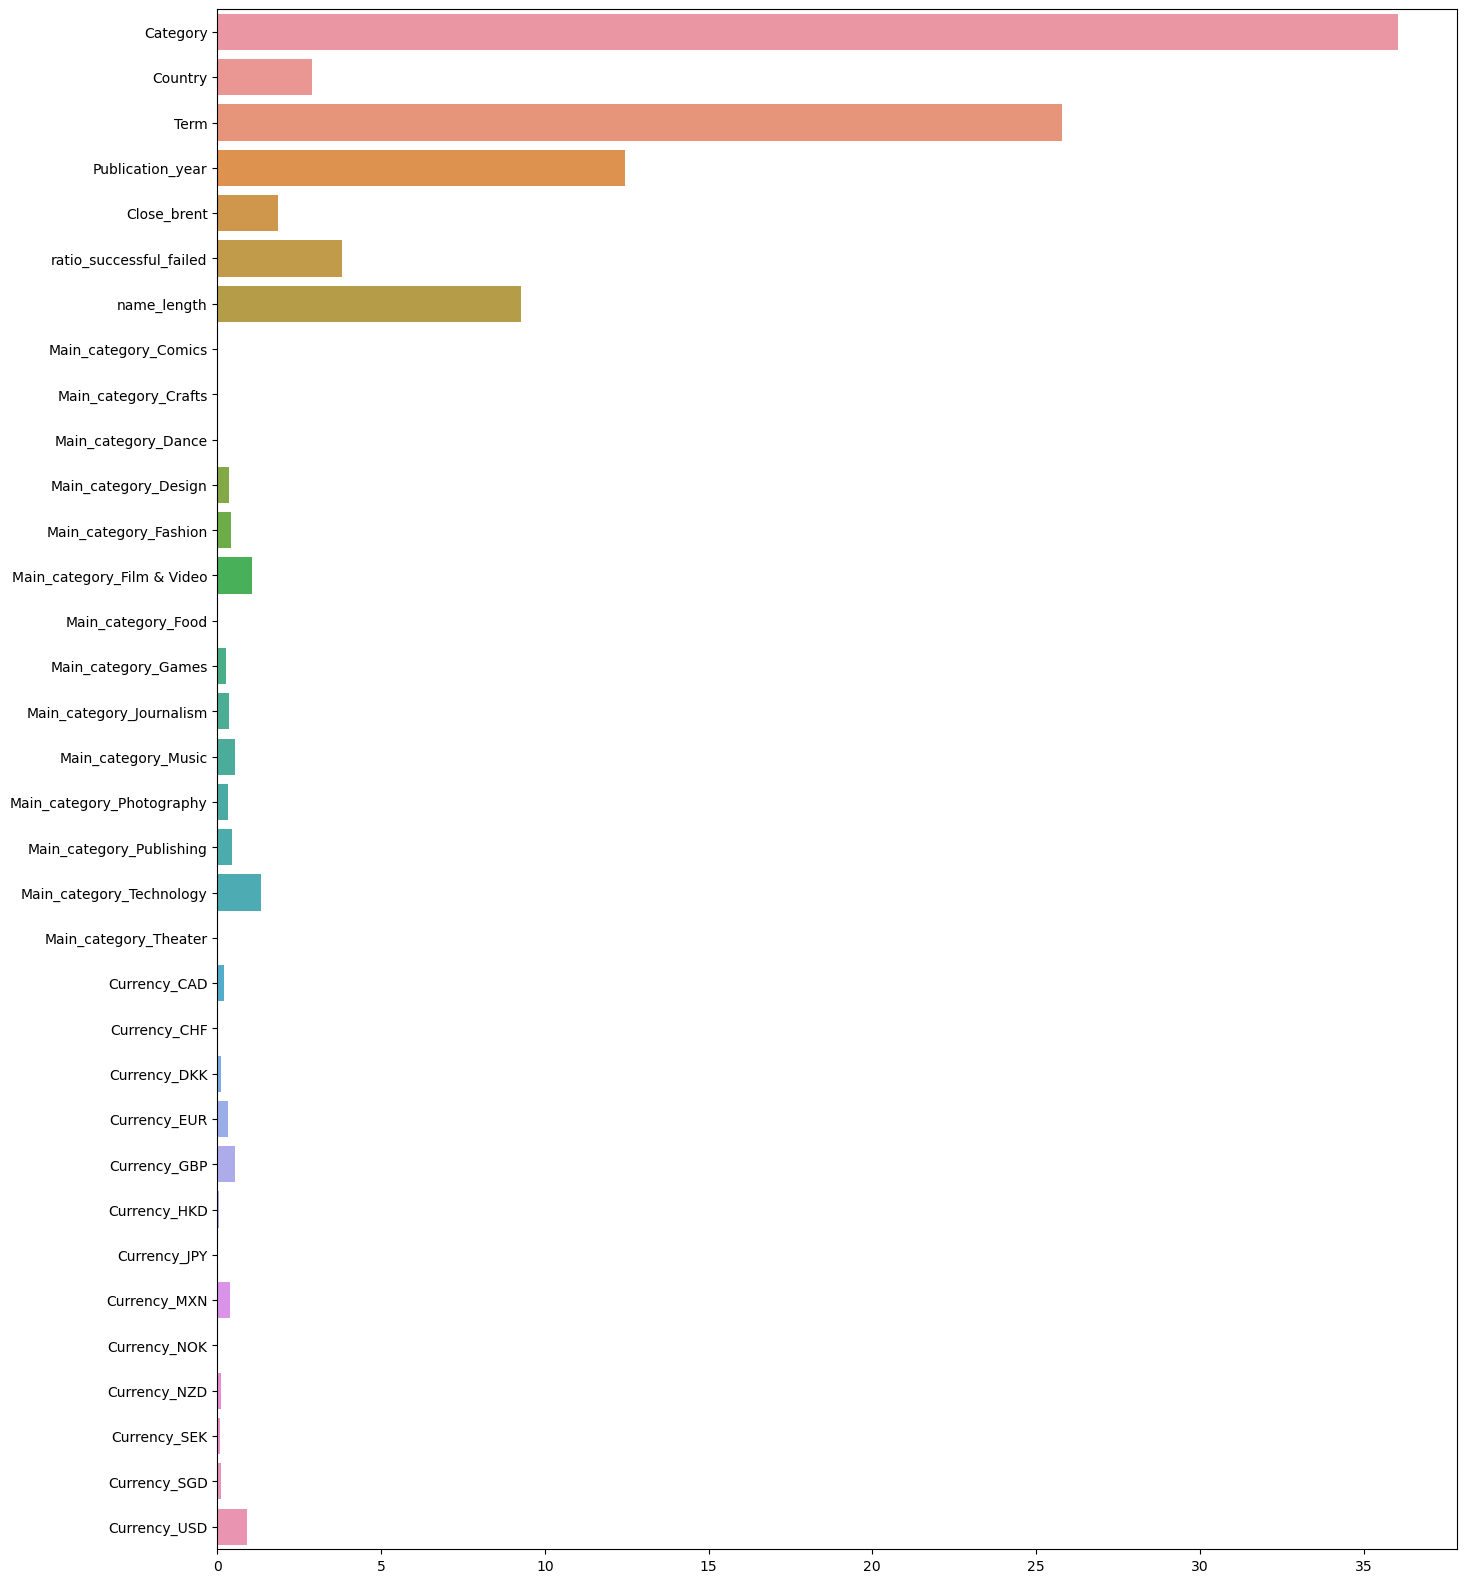

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x=model_CB.feature_importances_,
            y=X_train.columns)


plt.show()